<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/ThingWorx_API_Snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.1 ThingWorx - Upload API Key
Run the following cell in order to upload a python file (file named something like "colabKeys.py") formatted like below:
```
twKey = '80e7bfea-4f21-430e-8999-a06f342a2018'
```

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  execfile(fn)

print('ThingWorx Key loaded as: '+twKey)

# 0.2 ThingWorx - Upload API Key from .json

Please upload the config.json file to your Google Colab session with the menu on the left or use drag and drop. 
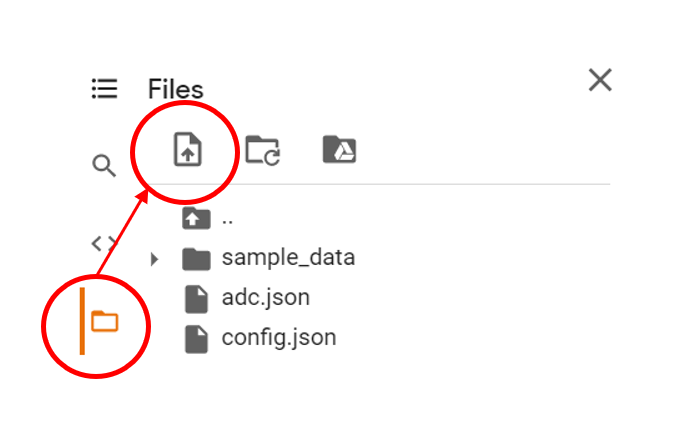 



After the file is uploaded execute following cell to load the authentication code (AppKey) into your workspace.

In [ ]:
import json

# open json file containing the AppKey
json_file = open("config.json")
config = json.load(json_file)
json_file.close()

# save the value of the AppKey to the twKey variable
twKey = config["appKey"]
print('AppKey added!')

# 0.3 ThingWorx - Directly Input ThingWorx Appkey (not secure if notebook is shared)
You can also just copy and paste your thingworx appkey below and execute the cell.

In [ ]:
twKey = '80e7bfea-4f21-430e-8999-a06f342a2018'

# 1.0 ThingWorx - Get Property Value
Below is an example of getting property values from ThingWorx. Make sure your appKey, property name, and url are set as strings. Your JSON may be formatted differently based on the setup of your Thing.

In [ ]:
import requests
import json

appKey = twKey
propName = 'BaseAngle'
URL = 'https://pp-1234abcd.portal.ptc.io/Thingworx/Things/MM_PLTW/Properties'

headers = {
        'appKey': appKey,
        'accept': 'application/json',
        'Content-Type':'application/json'
    }

response = requests.get(URL,headers=headers)

FullResponse = json.dumps(response.json(), indent=4, sort_keys=True)

#print(FullResponse) #this prints a well formatted version of the JSON response
print(response.json()['rows'][0][propName]) #this prints just the value of your specified property

1234


# 2.0 ThingWorx - Set Property Value

Below is an example of setting a property value in a Thing with a put request. Again, make sure your parameters are all in quotes. You'll know it worked if you get a "200" response.

In [ ]:
import requests

appKey = twKey
propName = 'WristAngle'
value = '1014'
url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/MM_PLTW/Properties/"+propName #end of URL should have the property name

payload="{\""+propName+"\":"+value+"}"
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json'
}

response = requests.request("PUT", url, headers=headers, data=payload)

print(response)

# 2.1 ThingWorx - Set Image Property

In [ ]:
import base64
import json
import requests

with open("photo.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

imgEncodedString = str(encoded_string)
imgString = imgEncodedString.split("'",1)[1]
appKey = twKey
url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/MM_STL_Test/Properties/ImageTest" #end of URL should have the property name

payload=json.dumps({"ImageTest":imgString})
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json'
}

response = requests.request("PUT", url, headers=headers, data=payload)

print(response)

# 3.0 ThingWorx - Call ThingWorx Service
Use HTTP Post requests to invoke a service in ThingWorx.

In [ ]:
import requests
import json

url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/ButterflyNotebook/Services/SearchDataTableEntries"

appKey = twKey
payload="{\n    \"searchExpression\":\"Steve\"\n}"
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json',
  'accept': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

FullResponse = json.dumps(response.json(), indent=4, sort_keys=True)

Img = response.json()['rows'][0]['Image']

print(response.json()['rows'][0]['Image'])

# import base64 
# png_recovered = base64.decodestring(response.json()['rows'][0]['Image'])
# f = open("temp.png", "w")
# f.write(png_recovered)
# f.close()

# from IPython.display import Image
# Image(filename='temp.png') 

# 3.1 ThingWorx - Show image from ThingWorx


In [ ]:
import requests
import json

appKey = twKey
url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/PerseveranceNotebook/Services/SearchDataTableEntries"

payload="{\n    \"searchExpression\":\" \"\n}"
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json',
  'accept': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

FullResponse = json.dumps(response.json(), indent=4, sort_keys=True)

Img = response.json()['rows'][0]['Image']
Imgurl = 'data:image/png;base64,'+response.json()['rows'][0]['Image']

from IPython.display import Image
Image(Img) 

# 3.1.1 ThingWorx - Download Images from ThingWorx


In [ ]:
import requests
import json
from google.colab import files

url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/Skittles2/Services/SearchDataTableEntries"

color = "Purple"

appKey = twKey
payload=json.dumps({"searchExpression":color})
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json',
  'accept': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)
print(response)
# FullResponse = json.dumps(response.json(), indent=4, sort_keys=True)

numberOfImg = len(response.json()['rows'])

for i in range(numberOfImg):
  Img = response.json()['rows'][i]['Image']

  filename = color+str(i)+'.jpg'

  binary = b64decode(Img)
  with open(filename, 'wb') as f:
    f.write(binary)
  files.download(filename)

# 3.2 ThingWorx - Download Datatable as CSV

In [ ]:
import requests
import json
from google.colab import files

url = "https://pp-1234abcd.portal.ptc.io/Thingworx/Things/Skittles2/Services/SearchDataTableEntries"

appKey = twKey
payload=json.dumps({"maxItems":500})
headers = {
  'appKey': appKey,
  'Content-Type': 'application/json',
  'accept': 'text/csv'
}

response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)

with open('trainingdata.csv','w') as f:
  f.write(response.text)
files.download('trainingdata.csv')

# 4.0 ThingWorx Analytics - Overview

All snippets are based on an example detailed in [this Github Repo](https://github.com/PTC-Education/Predictive-Maintenance-Demonstrator/tree/main/thingworx_analytics_scripts). All cusotm services can be downloaded as a ThingWorx .xml file, or copied and pasted as JS code into your own custom service [from this folder](https://github.com/PTC-Education/Predictive-Maintenance-Demonstrator/tree/main/thingworx_analytics_scripts).

# 4.1 ThingWorx Analytics - Get Data from Google Sheets

In [ ]:
# authenticate to read data from Google docs
# necessary if private spreadsheets are used

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


Please enter your Google spreadsheet link in the cell down below in the 2nd line:

```
# worksheet = gc.open_by_url('Your_URL_here').sheet1
```

In [ ]:
# open the Google spreadsheet, change the URL to the spreadsheet containing your training data
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/12ZeX27eSjNJJKrgu6eKGFqw8-QFGaI_-2f7enehArmQ/edit?usp=sharing').sheet1

# read in all data as a list
data = worksheet.get_all_values()

# create a dict that follows the style for data in a Thingworx infotable 
# the dictionary has the key 'rows' and the corresponding value is a list of dicts
transformed_data =  {'rows': []}
for row in range(len(data)):
  # create an empty dictionary for each row
  dict= {}
  # skip first row (headers)
  if row is 0:
    pass
  else:
    for col in range(len(data[0])):
      # add new key - value pairs for the dict, one pair for each column
      dict [data[0][col]] = data[row][col] 
  
    # append the dictionary of one row to the list of dictionaries
    transformed_data['rows'].append(dict)
  
 
print("Training data import finished!")

# print out the transformed data that can be used as Thingworx data input 
# print(transformed_data)
  

# 4.2 ThingWorx Analytics - Train a Model

The following cell will ask for the name of the goal feature. This is the feature that Thingworx Analytics will predict. For the training of a model you have to supply the goal values within your data set and Thingworx Analytics will train the model to predict the goal feature based on data of the other features provided. 

Please make sure that the name of the goal you enter is identical to the name of the column you want to use.  

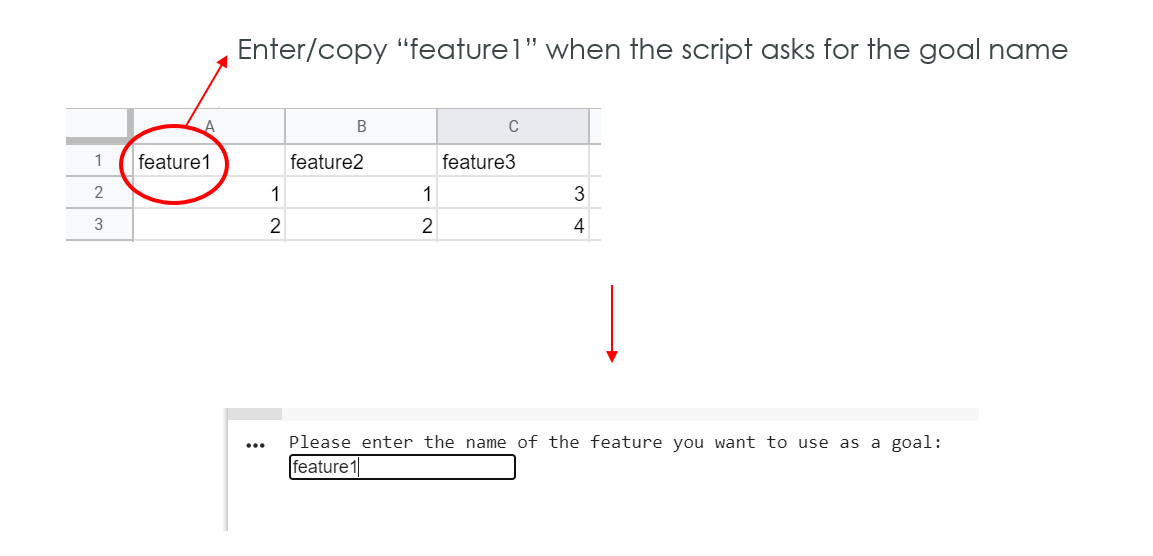



In [ ]:
import requests
import json

# disable https warning from python
# source: https://stackoverflow.com/questions/27981545/suppress-insecurerequestwarning-unverified-https-request-is-being-made-in-pytho
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# specify url of your Thingworx instance
url = 'https://pp-1234abcd.portal.ptc.io/Thingworx/Things/JA_Generic_Analytics_Thing/Services/TrainAnalyticsModel'
headers = {'Content-Type': 'application/json', 'accept': 'application/json', "appKey": twKey}

# Specify the goal for training (the column you want to predict)
goal = input("Please enter the name of the feature you want to use as a goal:\n") 


# prepare the Thingworx Service call
def call_thingworx_service():
    payload = {"goal": goal, # use the input from the user as goal 
               "trainingData": { # Thingworx Infotable containing the training data
                   "dataShape": { # Thingworx needs this information to know which name and data types the individual columns in spreadsheet have
                       "fieldDefinitions": { # add a empty dictionary, data shape information gets filled in later
                       }
                   },
                  "rows": transformed_data["rows"]}, # each row contains the values of one row of the spreadsheet that was read in before
               "metadataInput": { # Thingworx Analytics need additional information of the data supplied for training
                   "dataShape": { # Same reason as above, used to define the structure of the Thingworx Infotable
                       "fieldDefinitions": { # following fields are the Infotable structure for AnalyticsDatasetMetadataFlattened Infotable
                                             # in Analytics builder you can manually add those definitions with a GUI 
                                             # https://support.ptc.com/help/thingworx_hc/thingworx_analytics_8/index.html#page/analytics%2Fanalytics-builder%2Freview_edit_metadata.html%23
                           "fieldName": {
                               "name": "fieldName",
                               "description": "",
                               "baseType": "STRING",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "dataType": {
                               "name": "dataType",
                               "description": "",
                               "baseType": "STRING",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "opType": {
                               "name": "opType",
                               "description": "",
                               "baseType": "STRING",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "min": {
                               "name": "min",
                               "description": "",
                               "baseType": "NUMBER",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "max": {
                               "name": "max",
                               "description": "",
                               "baseType": "NUMBER",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "values": {
                               "name": "values",
                               "description": "",
                               "baseType": "INFOTABLE",
                               "ordinal": 0,
                               "aspects": {
                                   "dataShape": "GenericStringList"
                               }
                           },
                           "timeSamplingInterval": {
                               "name": "timeSamplingInterval",
                               "description": "",
                               "baseType": "INTEGER",
                               "ordinal": 0,
                               "aspects": {

                               }
                           },
                           "isStatic": {
                               "name": "isStatic",
                               "description": "",
                               "baseType": "BOOLEAN",
                               "ordinal": 0,
                               "aspects": {
                                   "defaultValue": "false"
                               }
                           }
                       }
                   },
                   "rows": [ # add empty list for the meta data information for each feature, data gets filled in later
                   ]
               }
               }
    
    datashape_dict = {"fieldDefinitions" : {}} # create a empty dictionary to fill in the field definitions for the training data
    metadata_list = [] # create a empty list to fill in the metadata information
   
    # fill the datashape definition of the training data read from the spreadsheet
    for col in range(len(data[0])): # iterate over columns
      datashape_dict["fieldDefinitions"][data[0][col]]= { #add new key to field definitions
          "name" : data[0][col], # name is the same value as the key 
          "aspects" : {
              "isPrimaryKey": "false"
          },
          "description": "",
          "baseType": "NUMBER" # only numbers are used for this script, Thingworx base types that can be used with Analytics are supported, see link down below
      }
      metadata_list.append({ # add metadata information for each column supplied in the spreadsheet, info on Analytics data types:
                            ## https://support.ptc.com/help/thingworx_hc/thingworx_analytics_8/index.html#page/analytics%2Fanalytics-data-key-infotables.html%23wwID0EONHU
                           "fieldName": data[0][col],
                           "dataType": "DOUBLE",
                           "opType": "CONTINUOUS",
                           "isStatic": "false"
                       })

    payload["metadataInput"]["rows"].extend(metadata_list) # add metadata information to the payload sent to Thingworx
    #print(payload["metadataInput"]["rows"])
    #print (datashape_dict)
    payload["trainingData"]["dataShape"].update(datashape_dict) # add training data information to the payload sent to Thingworx
    #print(payload["trainingData"]["dataShape"])
    thingworx_response = requests.post(url, headers=headers, json=payload, verify=False)
    return thingworx_response


response = call_thingworx_service() # execute the the service call
if response.status_code == 200: # check the response 
    result = json.loads(response.text)
    modelUri = result["rows"][0]["result"] # read the model URI from the complete Thingworx response    
    print("The URI for the Analytics model is: " + modelUri)
    print("Please call the check model status service next, to see if the training is finished!")
else:
    print("Request failed with error code: " + str(response))
    print("Thingworx error code: " + str(response.text))



# 4.3 ThingWorx Analytics - Check model status
 Real time predictions can only be executed once the training is finished. Depending on the size of the training set this process is more time consuming. Once the status for the following code cell is COMPLETED you can start using the real time prediction.


 ### IMPORTANT: copy and save your model URI
 If the Google Colab session is closed, the modelUri variable will be cleared!

In [ ]:
import time

url = 'https://pp-1234abcd.portal.ptc.io/Thingworx/Things/JA_Generic_Analytics_Thing/Services/GetModelStatus'
headers = {'Content-Type': 'application/json', 'accept': 'application/json', "appKey": twKey}



def call_thingworx_service():
    payload = {"modelUri": modelUri}
    thingworx_response = requests.post(url, headers=headers, json=payload, verify=False)
    return thingworx_response


response = call_thingworx_service()
if response.status_code == 200:
    result = json.loads(response.text)
    while result["rows"][0]["state"] != "COMPLETED":
      print("Training of the model is not finished yet.")
      time.sleep(20)
      response = call_thingworx_service()
      if response.status_code == 200:
         result = json.loads(response.text)  
         

    status = result["rows"][0]["state"]  # read the state of the complete Thingworx response
    print("The current training status for the Analytics model with URI " + modelUri +" is: " + status)
else:
    print("Request failed with error code: " + str(response))
    print("Thingworx error code: " + str(response.text))

# 4.4 ThingWorx Analytics - Run real time predictions (real time scoring)
Once the model finished training and status returned COMPLETED these code cells can be executed. A different Google spreadsheet is used as input for the Analytics predictions. Please make sure, that the column headers are the same as used for the training data. But this time there is no column for the feature you specified as goal variable => data for real time predictions has one column less than the training data.




If you are just executing real time predictions without training the model right before, please run the cell below, otherwise you can skip it.

In [ ]:
# authenticate to read data from Google docs
# necessary if private spreadsheets are used

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Run the cell below, if real time predictions should be executed, with a previously trained model. No information of the model URI is available in the notebook, so please provide the URI below. The cell below can be skipped, if the training of the model was executed in the same Colab session.

In [ ]:
import json

modelUri = "79f05788-07af-49c8-a9a5-9b1da9314094" # Please insert your model URI here

# open json file containing the AppKey
json_file = open("config.json")
config = json.load(json_file)
json_file.close()

# save the value of the AppKey to the twKey variable
twKey = config["appKey"]
print('AppKey added!')



The following cell will read the data that should be used as input for a prediction from the Spreadsheet provided. Specify the URL to the spreadsheet that should be used as input for the real time predictions.

Please enter your Google spreadsheet link in the cell down below in the 5th line:

```
# worksheet = gc.open_by_url('Your_URL_here').sheet1
```



In [ ]:
import requests
import json

# open the Google spreadsheet, change the URL to the spreadsheet containing your test data
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_JxyAx_E8BC_ZZVSzZCNj-pdakepFx4eYjEd2AuCUxg/edit?usp=sharing').sheet1

# read in all data as a list
data = worksheet.get_all_values()

# create a dict that follows the style for data in a Thingworx infotable 
# the dictionary has the key 'rows' and the corresponding value is a list of dicts
transformed_data =  {'rows': []}
for row in range(len(data)):
  # create an empty dictionary for each row
  dict= {}
  # skip first row (headers)
  if row is 0:
    pass
  else:
    for col in range(len(data[0])):
      # add new key - value pairs for the dict, one pair for each column
      dict [data[0][col]] = data[row][col] 
  
    # append the dictionary of one row to the list of dictionaries
    transformed_data['rows'].append(dict)
  
 
print("Scoring data import finished!")

# print out the transformed data that can be used as Thingworx data input 
# print(transformed_data)


# specify URL of your Thingworx instance
url = 'https://pp-1234abcd.portal.ptc.io/Thingworx/Things/JA_Generic_Analytics_Thing/Services/RunPrediction'
headers = {'Content-Type': 'application/json', 'accept': 'application/json', "appKey": twKey}


def call_thingworx_service():
    payload = {"goal": goal, # goal is specified by the user while uploading the training data
               "modelUri": modelUri, # model Uri is retreived 
               "scoringData": {
                   "dataShape": {
                       "fieldDefinitions": {
                           }
                       },
                    "rows": transformed_data["rows"]
                   }
               }
    datashape_dict = {"fieldDefinitions" : {}} # create a empty dictionary to fill in the field definitions for the training data  
    # fill the datashape definition of the scoring data read from the spreadsheet
    for col in range(len(data[0])): # iterate over columns
      datashape_dict["fieldDefinitions"][data[0][col]]= { #add new key to field definitions
          "name" : data[0][col], # name is the same value as the key 
          "aspects" : {
              "isPrimaryKey": "false"
          },
          "description": "",
          "baseType": "NUMBER" # only numbers are used for this script, Thingworx base types that can be used with Analytics are supported, see link down below
      }
    #print(datashape_dict)
    payload["scoringData"]["dataShape"].update(datashape_dict) # add training data information to the payload sent to Thingworx
    thingworx_response = requests.post(url, headers=headers, json=payload, verify=False)
    return thingworx_response


response = call_thingworx_service()
if response.status_code == 200: 
    result = json.loads(response.text)
    goalValue = result["rows"][0][goal]  # read the goal value from the complete Thingworx response
    print("The predicted value for the goal is: " + goalValue)
else:
    print("Request failed with error code: " + str(response))
    print("Thingworx error code: " + str(response.text))